# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [5]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [6]:
for column in websites.columns:
    unique_values = websites[column].unique()
    print(f"Unique values in column '{column}': {len(unique_values)}")
    
"""We see we could convert only charset from categorical to numerical, because the other columns have too much
possible values. It is still too big, but I am going to try with that before making a decision."""

Unique values in column 'URL': 1781
Unique values in column 'URL_LENGTH': 142
Unique values in column 'NUMBER_SPECIAL_CHARACTERS': 31
Unique values in column 'CHARSET': 9
Unique values in column 'SERVER': 239
Unique values in column 'CONTENT_LENGTH': 638
Unique values in column 'WHOIS_COUNTRY': 49
Unique values in column 'WHOIS_STATEPRO': 182
Unique values in column 'WHOIS_REGDATE': 891
Unique values in column 'WHOIS_UPDATED_DATE': 594
Unique values in column 'TCP_CONVERSATION_EXCHANGE': 103
Unique values in column 'DIST_REMOTE_TCP_PORT': 66
Unique values in column 'REMOTE_IPS': 18
Unique values in column 'APP_BYTES': 825
Unique values in column 'SOURCE_APP_PACKETS': 113
Unique values in column 'REMOTE_APP_PACKETS': 116
Unique values in column 'SOURCE_APP_BYTES': 885
Unique values in column 'REMOTE_APP_BYTES': 822
Unique values in column 'APP_PACKETS': 113
Unique values in column 'DNS_QUERY_TIMES': 11
Unique values in column 'Type': 2


'We see we could convert only charset from categorical to numerical, because the other columns have too much\npossible values. It is still too big, but I am going to try with that before making a decision.'

In [7]:
hot_encoded = pd.get_dummies(websites['CHARSET'])
websites_encoded = pd.concat([websites, hot_encoded], axis=1)

In [8]:
websites_encoded
"""I think it is better not to do the encoding and leave it like it was."""

'I think it is better not to do the encoding and leave it like it was.'

In [9]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [10]:
# Your comment here
"""We want to predict the column Type (0-1). The other columns are the features. """

'We want to predict the column Type (0-1). The other columns are the features. '

In [11]:
websites["Type"].value_counts() 

""" 0 are the ones that are benign and 1 the ones that are malign"""

' 0 are the ones that are benign and 1 the ones that are malign'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [12]:
# Your code here
websites_matrix = websites.corr(numeric_only=True)
websites_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


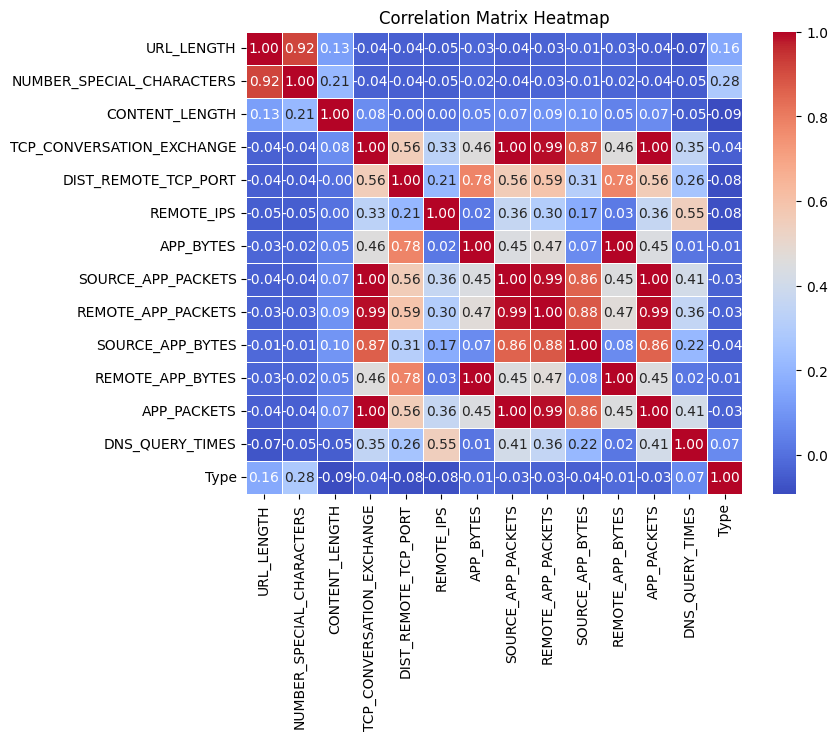

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
"""According to this, we should remove REMOTE_APP_PACKETS, NUMBER_SPECIAL_CHARACTERS and TCP_CONVERSATION_EXCHANGE. We could take out more,
but I think is safer to remove only if the correlation is 0.90 or more."""

'According to this, we should remove REMOTE_APP_PACKETS, NUMBER_SPECIAL_CHARACTERS and TCP_CONVERSATION_EXCHANGE. We could take out more,\nbut I think is safer to remove only if the correlation is 0.90 or more.'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [15]:
websites = websites.drop("REMOTE_APP_PACKETS", axis = 1)
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0.0,0


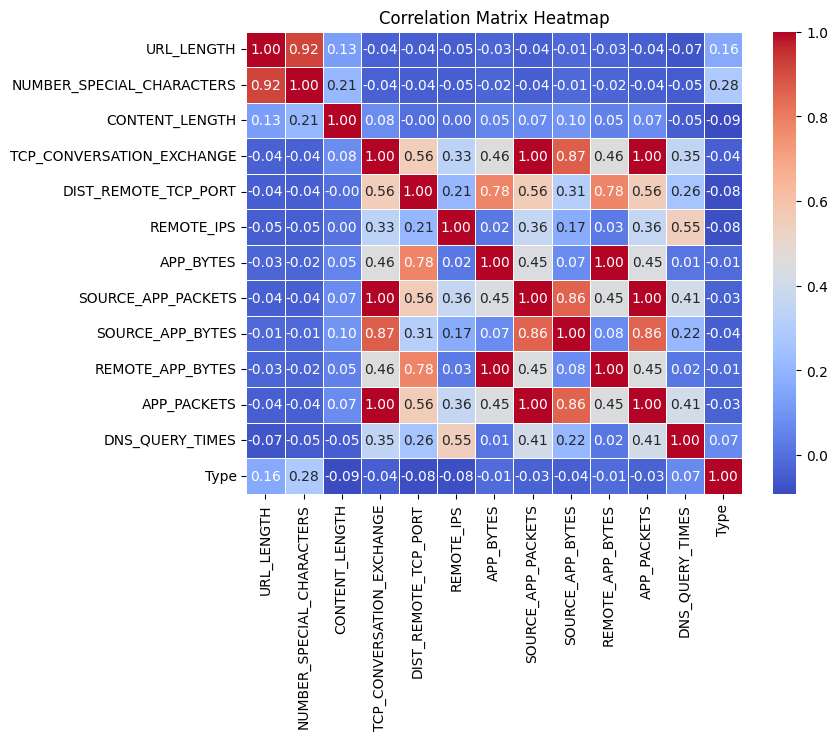

In [16]:
# Your code here
websites_matrix = websites.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

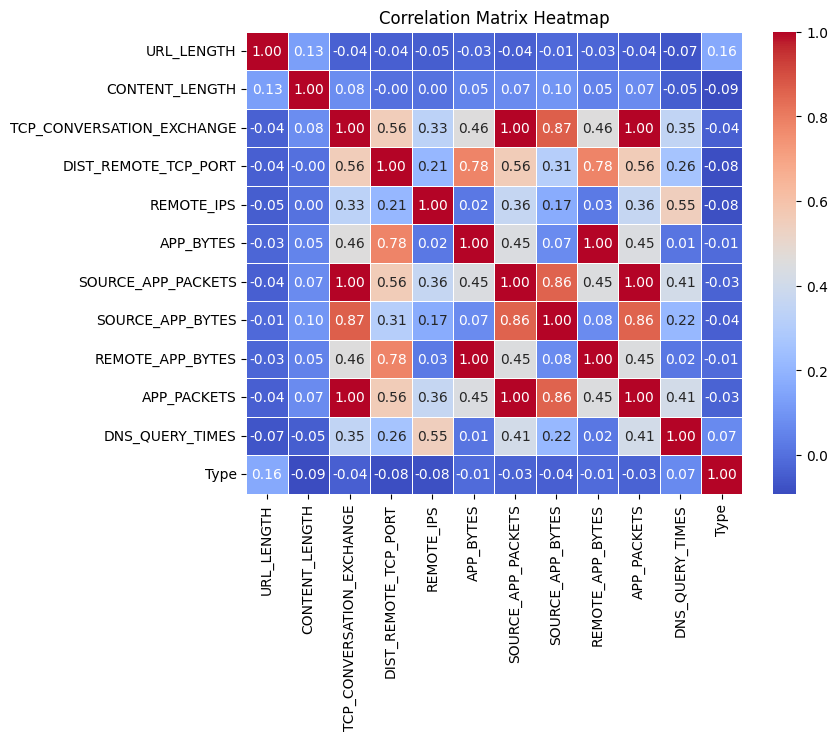

In [17]:
websites = websites.drop("NUMBER_SPECIAL_CHARACTERS", axis = 1)
websites_matrix = websites.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

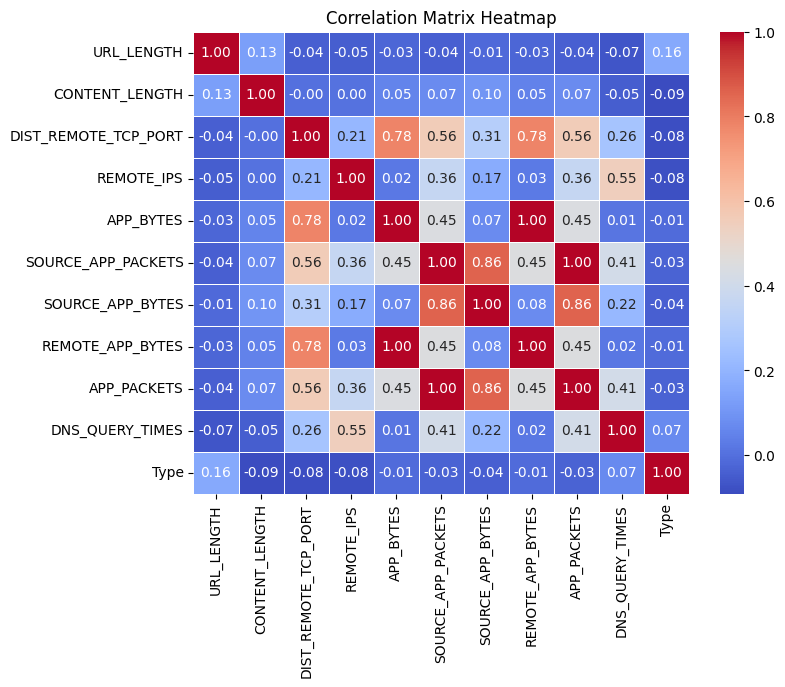

'Here we see we have to take out SOURCE_APP_PACKETS and REMOTE_APP_BYTES'

In [18]:
websites = websites.drop("TCP_CONVERSATION_EXCHANGE", axis = 1)
websites_matrix = websites.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
"""Here we see we have to take out SOURCE_APP_PACKETS and REMOTE_APP_BYTES"""

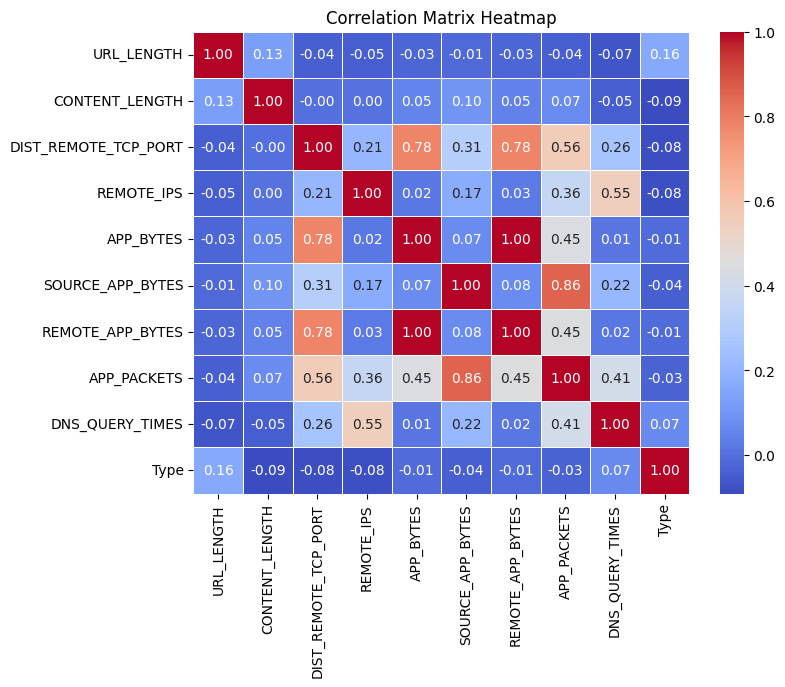

In [19]:
websites = websites.drop("SOURCE_APP_PACKETS", axis = 1)
websites_matrix = websites.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

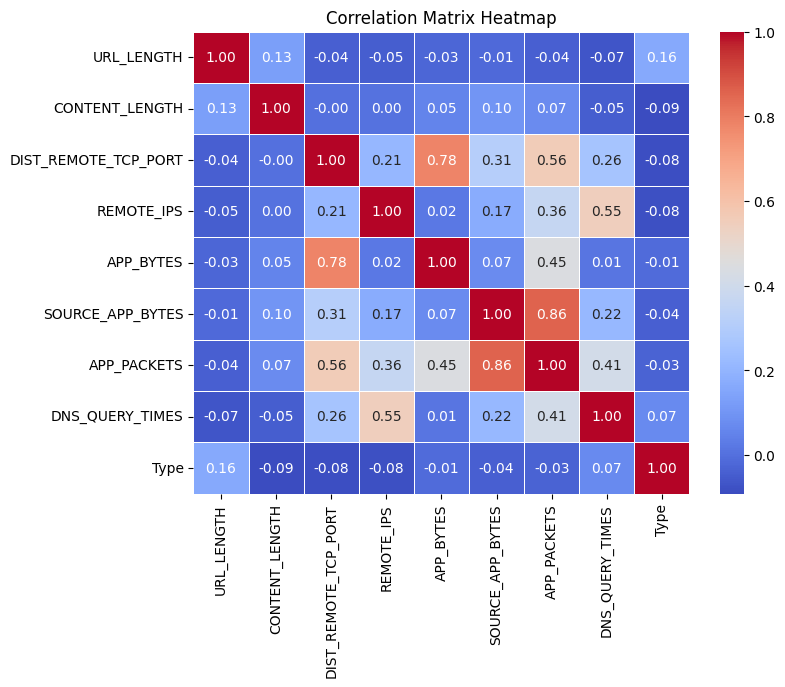

'Now it is okay, there is no correlation over 0.90'

In [20]:
websites = websites.drop("REMOTE_APP_BYTES", axis = 1)
websites_matrix = websites.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(websites_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

"""Now it is okay, there is no correlation over 0.90"""

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [21]:
websites.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
CONTENT_LENGTH          812
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [22]:
websites.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [23]:
for c in websites.columns:
    print(c)
    print(websites[c].isna().sum() / len(websites[c]))

URL
0.0
URL_LENGTH
0.0
CHARSET
0.0039303761931499155
SERVER
0.09882088714205503
CONTENT_LENGTH
0.45592363840539024
WHOIS_COUNTRY
0.17181358787198203
WHOIS_STATEPRO
0.20325659741718136
WHOIS_REGDATE
0.07130825379000562
WHOIS_UPDATED_DATE
0.07804604154969118
DIST_REMOTE_TCP_PORT
0.0
REMOTE_IPS
0.0
APP_BYTES
0.0
SOURCE_APP_BYTES
0.0
APP_PACKETS
0.0
DNS_QUERY_TIMES
0.0005614823133071309
Type
0.0


In [24]:
"""I think we should get rid of any column with more than 30% of missing data"""
for c in websites.columns:
    if websites[c].isna().sum() / len(websites[c]) >= 0.3:
        websites.drop(c, axis = 1, inplace = True)
websites

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN,0,2,700,1153,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN,7,4,1230,1265,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,18784,39,8.0,0
4,B0_403,17,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,129889,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,186,0,0.0,1
1777,M4_41,198,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,124,0,0.0,1
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,2,6,6631,132181,87,4.0,0
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0.0,0


In [25]:
websites.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [26]:
"""Now we get rid of the rows that contain the rest of the missing values"""
websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [27]:
websites.isna().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [28]:
websites["WHOIS_COUNTRY"].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [29]:
websites[websites["WHOIS_COUNTRY"] == "us"] = "US"
websites[websites["WHOIS_COUNTRY"] == "Cyprus"] = "CY"
websites[websites["WHOIS_COUNTRY"] == "se"] = "SE"
websites[websites["WHOIS_COUNTRY"] == "UK"] = "GB"
websites[websites["WHOIS_COUNTRY"] == "[u'GB'; u'UK']"] = "GB"
websites[websites["WHOIS_COUNTRY"] == "ru"] = "RU"
websites["WHOIS_COUNTRY"].unique()

/var/folders/wk/24hqhn4d5jngl5h7k4s5bdk40000gp/T/ipykernel_74477/4178477294.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'US' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  websites[websites["WHOIS_COUNTRY"] == "us"] = "US"
/var/folders/wk/24hqhn4d5jngl5h7k4s5bdk40000gp/T/ipykernel_74477/4178477294.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'US' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  websites[websites["WHOIS_COUNTRY"] == "us"] = "US"


array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [30]:
websites["WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
GB     22
PA     21
JP     10
IN      8
CZ      8
CN      8
RU      6
NL      5
CH      5
BS      4
AT      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
LV      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
TR      1
Name: count, dtype: int64

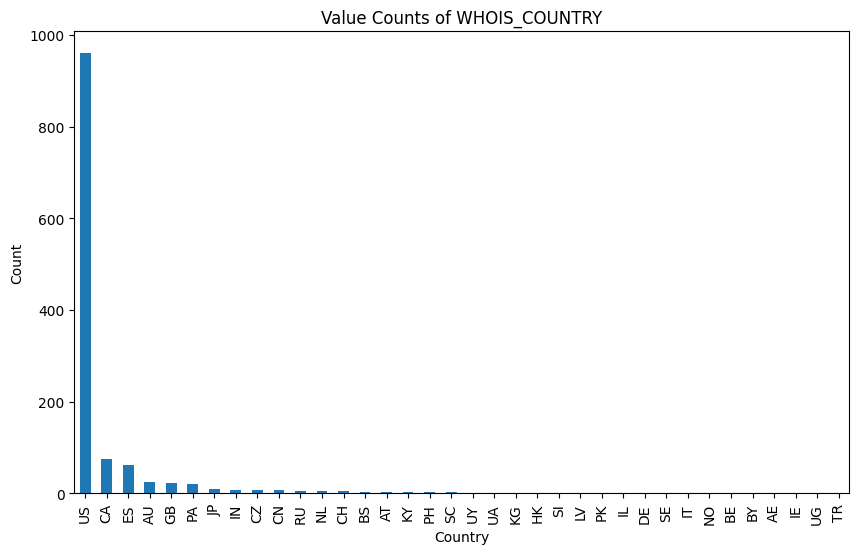

In [31]:
plt.figure(figsize=(10, 6))
websites["WHOIS_COUNTRY"].value_counts().plot(kind='bar')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [32]:
low_count_countries = websites["WHOIS_COUNTRY"].value_counts()[websites["WHOIS_COUNTRY"].value_counts() < 8].index
websites.loc[websites['WHOIS_COUNTRY'].isin(low_count_countries), 'WHOIS_COUNTRY'] = 'OTHER'
websites["WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     56
AU        26
GB        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [33]:
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis = 1)

In [34]:
websites

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,US,22,3,3812,18784,39,8.0,0
5,B0_2064,18,UTF-8,nginx,OTHER,6,9,894,838,11,0.0,0
6,B0_462,18,iso-8859-1,Apache/2,US,0,3,1189,8559,14,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0.0,0
10,B0_1013,20,utf-8,Apache,US,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,ES,0,0,0,186,0,0.0,1
1777,M4_41,198,UTF-8,Apache,ES,0,0,0,124,0,0.0,1
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),US,2,6,6631,132181,87,4.0,0
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,US,0,0,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [35]:
websites.info()
"""Here we can see they are all object types."""

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   URL                   1257 non-null   object
 1   URL_LENGTH            1257 non-null   object
 2   CHARSET               1257 non-null   object
 3   SERVER                1257 non-null   object
 4   WHOIS_COUNTRY         1257 non-null   object
 5   DIST_REMOTE_TCP_PORT  1257 non-null   object
 6   REMOTE_IPS            1257 non-null   object
 7   APP_BYTES             1257 non-null   object
 8   SOURCE_APP_BYTES      1257 non-null   object
 9   APP_PACKETS           1257 non-null   object
 10  DNS_QUERY_TIMES       1257 non-null   object
 11  Type                  1257 non-null   object
dtypes: object(12)
memory usage: 127.7+ KB


'Here we can see they are all object types.'

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [36]:
websites = websites.drop("URL", axis = 1)
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   URL_LENGTH            1257 non-null   object
 1   CHARSET               1257 non-null   object
 2   SERVER                1257 non-null   object
 3   WHOIS_COUNTRY         1257 non-null   object
 4   DIST_REMOTE_TCP_PORT  1257 non-null   object
 5   REMOTE_IPS            1257 non-null   object
 6   APP_BYTES             1257 non-null   object
 7   SOURCE_APP_BYTES      1257 non-null   object
 8   APP_PACKETS           1257 non-null   object
 9   DNS_QUERY_TIMES       1257 non-null   object
 10  Type                  1257 non-null   object
dtypes: object(11)
memory usage: 117.8+ KB


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [37]:
websites["CHARSET"].unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8', 'GB',
       'RU', 'windows-1251', 'US', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [38]:
websites["SERVER"].unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)', 'GB',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.

![Think Hard](../images/think-hard.jpg)

In [39]:
"""I think there are way too much values, so we may group by the really big ones, like Apache 
and then place the others under 'OTHER', like we did before with the countries"""

"I think there are way too much values, so we may group by the really big ones, like Apache \nand then place the others under 'OTHER', like we did before with the countries"

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [40]:
"""we cannot use this because it doesn't take any microsoft label, for example, and also
it only takes apache or nginx when that is all the name they have, but not when it is followed by
something else. As we want to group everything that is from Microsoft, Apache or nginx, we should think of 
something else."""
#websites.loc[~websites['SERVER'].isin(["Microsoft", "Apache", "nginx"]), 'SERVER'] = "OTHER"

"we cannot use this because it doesn't take any microsoft label, for example, and also\nit only takes apache or nginx when that is all the name they have, but not when it is followed by\nsomething else. As we want to group everything that is from Microsoft, Apache or nginx, we should think of \nsomething else."

In [41]:
main_server_names = ["Microsoft", "Apache", "nginx"]
pattern = re.compile(r'(' + '|'.join(main_server_names) + r')(?=-|$)')
websites['SERVER'] = websites['SERVER'].apply(lambda x: pattern.match(x).group(0) if pattern.match(x) else 'OTHER')

In [42]:
websites["SERVER"].unique()

array(['nginx', 'OTHER', 'Microsoft', 'Apache'], dtype=object)

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [44]:
website_dummy = pd.get_dummies(websites[["WHOIS_COUNTRY", "CHARSET", "SERVER"]], drop_first=True, dtype= int)

In [45]:
websites.drop(["WHOIS_COUNTRY", "CHARSET", "SERVER"], axis=1, inplace=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [46]:
websites = pd.concat([websites, website_dummy], axis=1)

In [47]:
websites

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,...,CHARSET_US,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_OTHER,SERVER_nginx
3,17,22,3,3812,18784,39,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,18,6,9,894,838,11,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,18,0,3,1189,8559,14,2.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,19,0,0,0,0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10,20,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,186,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1777,198,0,0,0,124,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1778,201,2,6,6631,132181,87,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1779,234,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
"""For some reason, I am getting the value GB in some of the rows, 
so I have to take them out"""

filas_gb = websites.eq('RU').any(axis=1)
websites = websites[~filas_gb]
websites

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,...,CHARSET_US,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_OTHER,SERVER_nginx
3,17,22,3,3812,18784,39,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,18,6,9,894,838,11,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,18,0,3,1189,8559,14,2.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,19,0,0,0,0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10,20,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,0,0,0,186,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1777,198,0,0,0,124,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1778,201,2,6,6631,132181,87,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1779,234,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
websites = websites.astype(int)

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [88]:
from sklearn.model_selection import train_test_split

X = websites.drop(columns=['Type'])
y = websites["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 3 to 1780
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   URL_LENGTH            1241 non-null   int64
 1   DIST_REMOTE_TCP_PORT  1241 non-null   int64
 2   REMOTE_IPS            1241 non-null   int64
 3   APP_BYTES             1241 non-null   int64
 4   SOURCE_APP_BYTES      1241 non-null   int64
 5   APP_PACKETS           1241 non-null   int64
 6   DNS_QUERY_TIMES       1241 non-null   int64
 7   WHOIS_COUNTRY_CA      1241 non-null   int64
 8   WHOIS_COUNTRY_CN      1241 non-null   int64
 9   WHOIS_COUNTRY_CZ      1241 non-null   int64
 10  WHOIS_COUNTRY_ES      1241 non-null   int64
 11  WHOIS_COUNTRY_GB      1241 non-null   int64
 12  WHOIS_COUNTRY_IN      1241 non-null   int64
 13  WHOIS_COUNTRY_JP      1241 non-null   int64
 14  WHOIS_COUNTRY_OTHER   1241 non-null   int64
 15  WHOIS_COUNTRY_PA      1241 non-null   int64
 16  WHOIS_COUNT

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
linear_model = LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [97]:
linear_model.fit(X_train, y_train)

/Users/SilviaMV/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [98]:
y_pred = linear_model.predict(X_test)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}; Accuracy Score: {accuracy}")

Confusion matrix: [[218   5]
 [  9  17]]; Accuracy Score: 0.9437751004016064


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
"""This model has 218 TN, 17 TP, 5 FP and 0 FN, with an accuracy of 0.94, so it seems it
has an overall good performance, but it would need a more exhaustive analysis"""

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [105]:
y_pred = neigh.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}; Accuracy Score: {accuracy}")

Confusion matrix: [[219   4]
 [  6  20]]; Accuracy Score: 0.9598393574297188


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [106]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}; Accuracy Score: {accuracy}")

Confusion matrix: [[221   2]
 [  6  20]]; Accuracy Score: 0.9678714859437751


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
"""Yes, there is an improvement, which means that the more neighbors the better for the
model"""

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [107]:
from sklearn.model_selection import train_test_split

X = websites.drop(columns=['Type'])
y = websites["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.preprocessing import RobustScaler

X_test_robust_scaler = RobustScaler().fit(X_test)
X_test_robust = X_test_robust_scaler.transform(X_test)
X_train_robust_scaler = RobustScaler().fit(X_train)
X_train_robust = X_train_robust_scaler.transform(X_train)

In [111]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train_robust,y_train)
y_pred = neigh.predict(X_test_robust)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}; Accuracy Score: {accuracy}")

Confusion matrix: [[221   2]
 [  8  18]]; Accuracy Score: 0.9598393574297188


In [ ]:
"""With kneighbors there is not much of a difference"""

In [112]:
from sklearn.model_selection import train_test_split

X = websites.drop(columns=['Type'])
y = websites["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.preprocessing import RobustScaler

X_test_robust_scaler = RobustScaler().fit(X_test)
X_test_robust = X_test_robust_scaler.transform(X_test)
X_train_robust_scaler = RobustScaler().fit(X_train)
X_train_robust = X_train_robust_scaler.transform(X_train)

In [117]:
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X_train_robust, y_train)
y_pred = linear_model.predict(X_test_robust)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}; Accuracy Score: {accuracy}")

Confusion matrix: [[219   4]
 [ 12  14]]; Accuracy Score: 0.9357429718875502


In [ ]:
"""First algorithm is even worse than before..."""